In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import string
import re
import matplotlib.pyplot as plt
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [2]:
train_df = pd.read_csv("kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("kaggle/input/nlp-getting-started/test.csv")
submission_df = pd.read_csv("kaggle/input/nlp-getting-started/sample_submission.csv")

# First data review

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [5]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [7]:
train_df.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [8]:
train_df.query('target == 0').head(15)

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
20,31,NaN,NaN,this is ridiculous....,0
21,32,NaN,NaN,London is cool ;),0
22,33,NaN,NaN,Love skiing,0
23,34,NaN,NaN,What a wonderful day!,0
24,36,NaN,NaN,LOOOOOOL,0


In [9]:
train_df.query('target == 1').head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [10]:
train_df_analysis = train_df.copy()
test_df_analysis = test_df.copy()

In [11]:
train_df_analysis['target'] = train_df_analysis['target'].map({1: 'Disaster', 0:'Not disaster'})

In [12]:
train_df_analysis.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Disaster
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Disaster
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,Disaster
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",Disaster
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Disaster
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,Disaster
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,Disaster
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,Disaster
8,14,NaN,NaN,There's an emergency evacuation happening now ...,Disaster
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,Disaster


In [13]:
train_df_analysis.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Disaster
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Disaster
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,Disaster
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",Disaster
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Disaster
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,Disaster
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,Disaster
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,Disaster
8,14,NaN,NaN,There's an emergency evacuation happening now ...,Disaster
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,Disaster


# Keyword analysis

In [14]:
train_df_analysis['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [15]:
print('Train set - Number of appearances "%20":', int(train_df_analysis['keyword'].str.count("%20").sum()))

Train set - Number of appearances "%20": 1198


In [16]:
train_df_analysis['keyword'] = train_df_analysis['keyword'].str.replace('%20', ' ')

In [17]:
print('Test set - Number of appearances "%20":', int(train_df_analysis['keyword'].str.count("%20").sum()))

Test set - Number of appearances "%20": 0


In [18]:
train_df_analysis['keyword'] = train_df_analysis['keyword'].str.replace('%20', ' ')


In [19]:
print('Test set - Number of appearances "%20":', int(train_df_analysis['keyword'].str.count("%20").sum()))

Test set - Number of appearances "%20": 0


In [20]:
train_df_analysis['keyword'].value_counts()

fatalities             45
deluge                 42
armageddon             42
body bags              41
damage                 41
                       ..
forest fire            19
epicentre              12
threat                 11
inundation             10
radiation emergency     9
Name: keyword, Length: 221, dtype: int64

In [21]:
train_df_analysis['keyword'].value_counts()

fatalities             45
deluge                 42
armageddon             42
body bags              41
damage                 41
                       ..
forest fire            19
epicentre              12
threat                 11
inundation             10
radiation emergency     9
Name: keyword, Length: 221, dtype: int64

<AxesSubplot:xlabel='count', ylabel='keyword'>

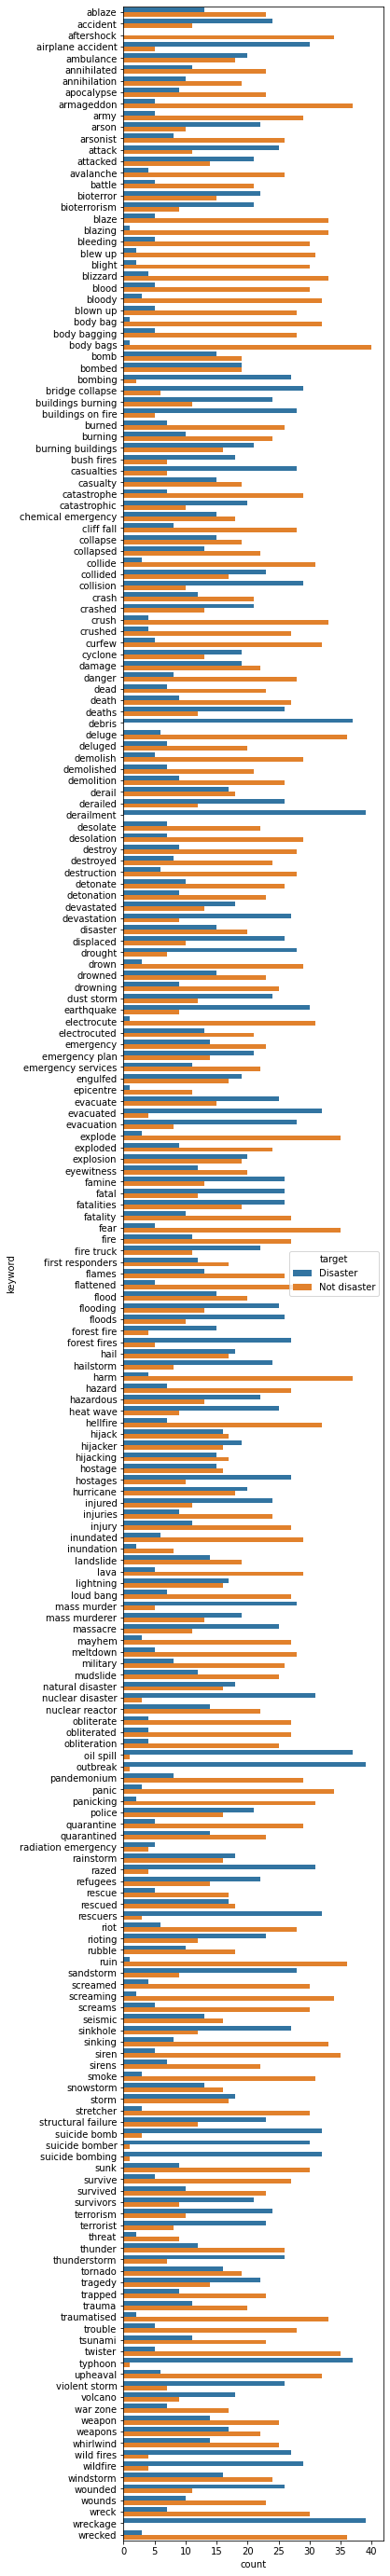

In [22]:
plt.figure(figsize=(5,50))
sns.countplot(y="keyword", hue='target', data=train_df_analysis)

<AxesSubplot:xlabel='count', ylabel='keyword'>

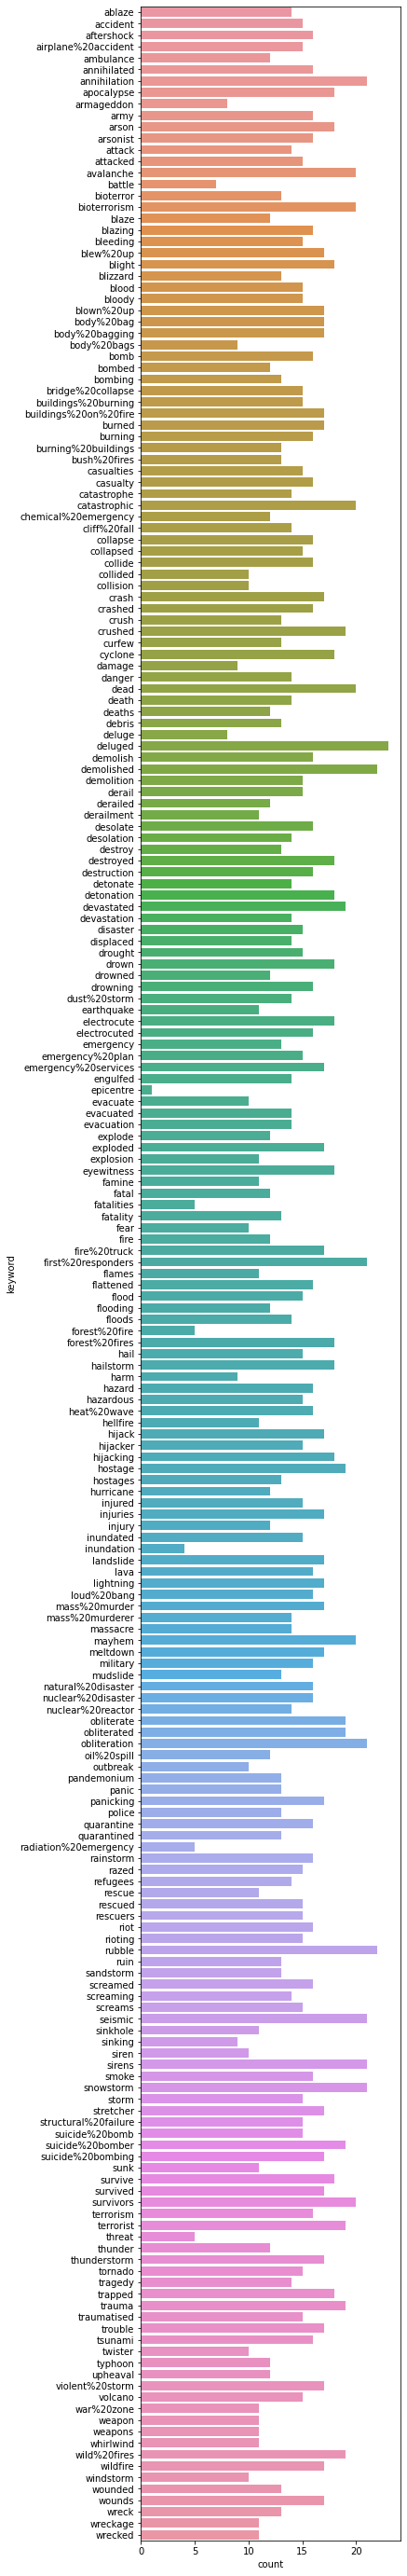

In [23]:
plt.figure(figsize=(5,50))
sns.countplot(y="keyword", data=test_df_analysis)

# Text analysis

In [24]:
train_df_analysis['word count'] = train_df_analysis['text'].apply(lambda x: len(x.split()))
test_df_analysis['word count'] = test_df_analysis['text'].apply(lambda x: len(x.split()))

In [25]:
train_df_analysis['unique words count'] = train_df_analysis['text'].apply(lambda x: len(x))
test_df_analysis['unique words count'] = test_df_analysis['text'].apply(lambda x: len(x))

In [26]:
train_df_analysis['characters count'] = train_df_analysis['text'].apply(lambda x: len(set(x.split())))
test_df_analysis['characters count'] = test_df_analysis['text'].apply(lambda x: len(set(x.split())))

In [27]:
train_df_analysis['hashtag count'] = train_df_analysis['text'].apply(lambda x: len([single_char for single_char in x if '#' in single_char]))
test_df_analysis['hashtag count'] = test_df_analysis['text'].apply(lambda x: len([single_char for single_char in x if '#' in single_char]))

In [28]:
train_df_analysis['mean word length'] = train_df_analysis['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
test_df_analysis['mean word length'] = test_df_analysis['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

In [29]:
train_df_analysis['@ count'] = train_df_analysis['text'].apply(lambda x: len([single_char for single_char in x if '@' in single_char]))
test_df_analysis['@ count'] = test_df_analysis['text'].apply(lambda x: len([single_char for single_char in x if '@' in single_char]))

In [30]:
train_df_analysis['http count'] = train_df_analysis['text'].apply(lambda x: len([word for word in x.lower().split() if 'http' in word or 'https' in word]))
test_df_analysis['http count'] = test_df_analysis['text'].apply(lambda x: len([word for word in x.lower().split() if 'http' in word or 'https' in word]))

In [31]:
train_df_analysis['punctuation_count'] = train_df_analysis['text'].apply(lambda x: len([single_char for single_char in str(x) if single_char in string.punctuation]))
test_df_analysis['punctuation_count'] = test_df_analysis['text'].apply(lambda x: len([single_char for single_char in str(x) if single_char in string.punctuation]))

In [32]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
train_df_analysis['stopwords count'] = train_df_analysis['text'].apply(lambda x: len([word for word in str(x).lower().split() if word in stopwords]))
test_df_analysis['stopwords count'] = test_df_analysis['text'].apply(lambda x: len([word for word in str(x).lower().split() if word in stopwords]))

In [33]:
train_df_analysis.head(15)

,id,keyword,location,text,target,word count,unique words count,characters count,hashtag count,mean word length,@ count,http count,punctuation_count,stopwords count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Disaster,13,69,13,1,4.384615,0,0,1,6
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Disaster,7,38,7,0,4.571429,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,Disaster,22,133,20,0,5.090909,0,0,3,11
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",Disaster,8,65,8,1,7.125000,0,0,2,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Disaster,16,88,15,2,4.500000,0,0,2,7
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,Disaster,18,110,18,3,5.166667,0,0,7,3
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,Disaster,14,95,14,2,5.857143,0,0,3,2
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,Disaster,15,59,14,0,3.000000,0,0,4,9
8,14,NaN,NaN,There's an emergency evacuation happening now ...,Disaster,12,79,11,0,5.666667,0,0,1,5
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,Disaster,10,52,10,0,4.300000,0,0,4,5


In [34]:
test_df_analysis.head(15)

,id,keyword,location,text,word count,unique words count,characters count,hashtag count,mean word length,@ count,http count,punctuation_count,stopwords count
0,0,NaN,NaN,Just happened a terrible car crash,6,34,6,0,4.833333,0,0,0,2
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",9,64,9,1,6.222222,0,0,3,2
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",19,96,19,0,4.105263,0,0,2,9
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,4,40,4,2,9.250000,0,0,3,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,8,45,8,0,4.750000,0,0,0,2
5,12,NaN,NaN,We're shaking...It's an earthquake,4,34,4,0,7.750000,0,0,5,1
6,21,NaN,NaN,They'd probably still show more life than Arse...,12,72,12,0,5.083333,0,0,4,3
7,22,NaN,NaN,Hey! How are you?,4,17,4,0,3.500000,0,0,2,2
8,27,NaN,NaN,What a nice hat?,4,16,4,0,3.250000,0,0,1,2
9,29,NaN,NaN,Fuck off!,2,9,2,0,4.000000,0,0,1,0


In [35]:
train_df_analysis.describe()

,id,word count,unique words count,characters count,hashtag count,mean word length,@ count,http count,punctuation_count,stopwords count
count,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,5441.934848,14.903586,101.037436,14.340733,0.446999,6.128494,0.362406,0.620255,6.839485,4.523184
std,3137.116090,5.732604,33.781325,5.277160,1.099841,1.675464,0.720097,0.664104,4.608758,3.419235
min,1.000000,1.000000,7.000000,1.000000,0.000000,2.250000,0.000000,0.000000,0.000000,0.000000
25%,2734.000000,11.000000,78.000000,11.000000,0.000000,4.875000,0.000000,0.000000,3.000000,2.000000
50%,5408.000000,15.000000,107.000000,14.000000,0.000000,5.928571,0.000000,1.000000,6.000000,4.000000
75%,8146.000000,19.000000,133.000000,18.000000,0.000000,7.058824,1.000000,1.000000,10.000000,7.000000
max,10873.000000,31.000000,157.000000,29.000000,13.000000,19.333333,8.000000,4.000000,61.000000,19.000000


In [36]:
test_df_analysis.describe()

,id,word count,unique words count,characters count,hashtag count,mean word length,@ count,http count,punctuation_count,stopwords count
count,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000
mean,5427.152927,14.965369,102.108183,14.407294,0.472878,6.183041,0.392277,0.631014,6.950659,4.464603
std,3146.427221,5.783576,33.972158,5.306016,1.090811,1.685506,0.758739,0.665277,4.486544,3.361322
min,0.000000,1.000000,5.000000,1.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,2683.000000,11.000000,78.000000,11.000000,0.000000,4.952381,0.000000,0.000000,4.000000,2.000000
50%,5500.000000,15.000000,109.000000,15.000000,0.000000,6.000000,0.000000,1.000000,7.000000,4.000000
75%,8176.000000,19.000000,134.000000,18.000000,0.000000,7.100000,1.000000,1.000000,10.000000,7.000000
max,10875.000000,31.000000,151.000000,28.000000,12.000000,16.500000,10.000000,4.000000,55.000000,18.000000


In [37]:
def plot(name):
    sns.displot(train_df_analysis, x=name, bins=len(train_df_analysis[name].value_counts()), hue="target", kde=True)
    
    


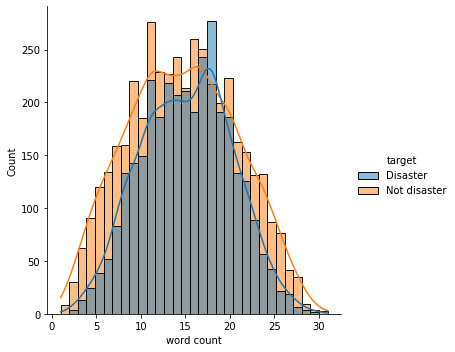

In [38]:
plot('word count')

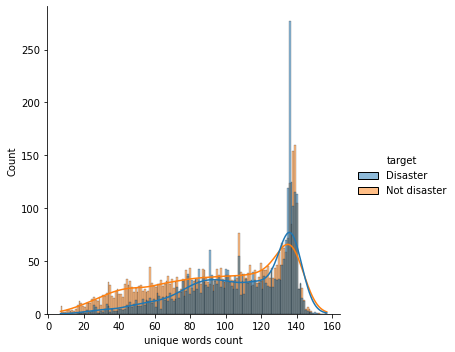

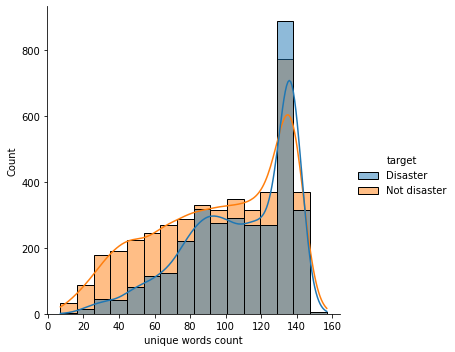

In [39]:
plot('unique words count')
sns.displot(train_df_analysis, x='unique words count', bins=16, hue="target", kde=True)

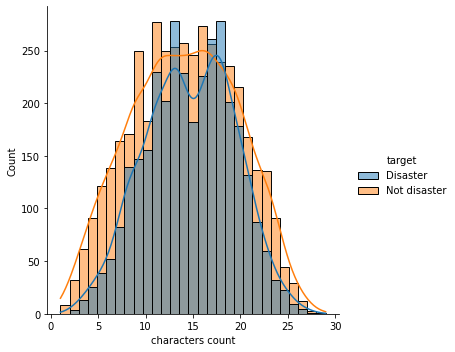

In [40]:
plot('characters count')

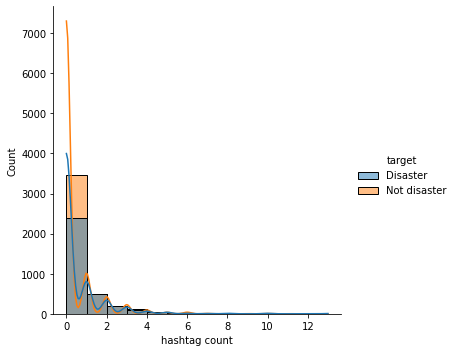

In [41]:
plot('hashtag count')

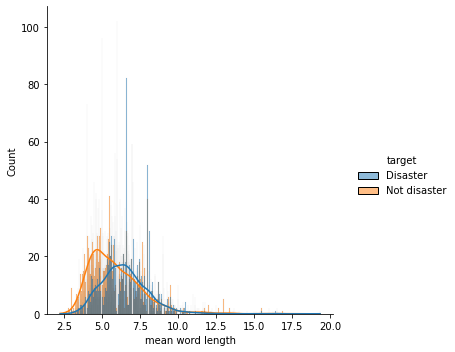

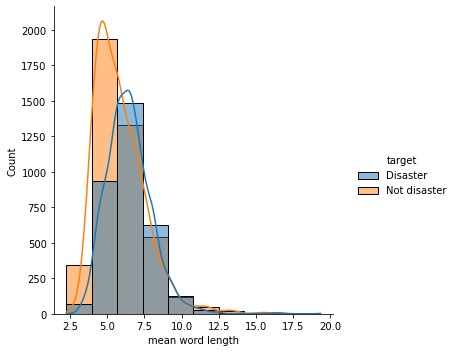

In [42]:
plot('mean word length')
sns.displot(train_df_analysis, x='mean word length', bins=10, hue="target", kde=True)

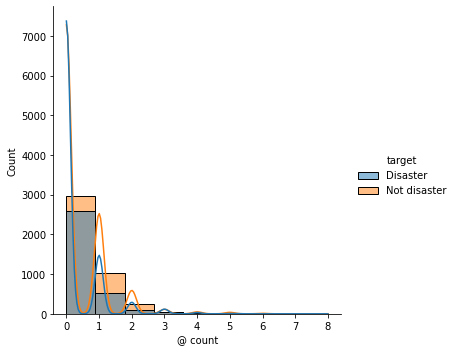

In [43]:
plot('@ count')

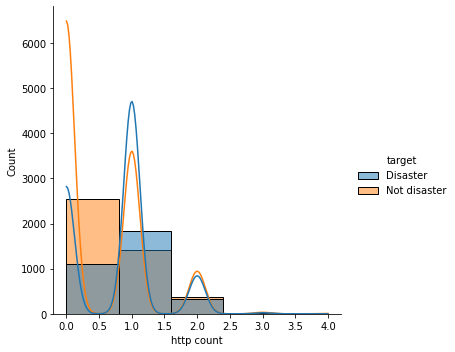

In [44]:
plot('http count')

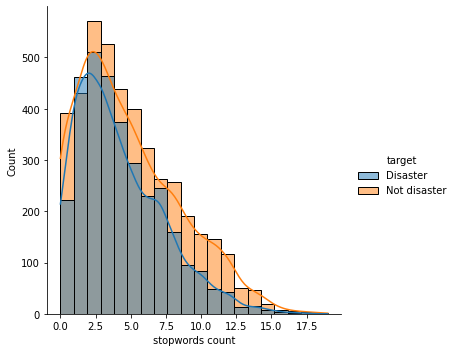

In [45]:
plot('stopwords count')

# Data cleaning

HTTP removing

In [46]:
def remove_http(text: str):
    non_http = re.sub(r'http\S+', '', text)
    return non_http


In [47]:
train_df['text_cleared'] = train_df['text'].apply(lambda x: remove_http(x))

In [48]:
test_df['text_cleared'] = test_df['text'].apply(lambda x: remove_http(x))

In [49]:
train_df.head(15)

,id,keyword,location,text,target,text_cleared
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,#RockyFire Update => California Hwy. 20 closed...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,#flood #disaster Heavy rain causes flash flood...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,I'm on top of the hill and I can see a fire in...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,There's an emergency evacuation happening now ...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,I'm afraid that the tornado is coming to our a...


Remove numbers

In [50]:
def remove_digit(text: str):
    non_digit = [single_char for single_char in text if single_char.isdigit() == False]
    new_sentence = ''.join(non_digit)
    return new_sentence

In [51]:
train_df['text_cleared'] = train_df['text_cleared'].apply(lambda x: remove_digit(x))

In [52]:
test_df['text_cleared'] = test_df['text_cleared'].apply(lambda x: remove_digit(x))

In [53]:
train_df.head(15)

,id,keyword,location,text,target,text_cleared
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,#RockyFire Update => California Hwy. closed i...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,#flood #disaster Heavy rain causes flash flood...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,I'm on top of the hill and I can see a fire in...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,There's an emergency evacuation happening now ...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,I'm afraid that the tornado is coming to our a...


Punctuation

In [54]:
def remove_punctuation(text: str):
    non_punctuation = [single_char for single_char in text if single_char not in string.punctuation]
    new_sentence = ''.join(non_punctuation)
    return new_sentence

In [55]:
train_df['text_cleared'] = train_df['text_cleared'].apply(lambda x: remove_punctuation(x))

In [56]:
test_df['text_cleared'] = test_df['text_cleared'].apply(lambda x: remove_punctuation(x))

In [57]:
train_df.head(15)

,id,keyword,location,text,target,text_cleared
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,RockyFire Update California Hwy closed in bo...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster Heavy rain causes flash floodin...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,Im on top of the hill and I can see a fire in ...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,Theres an emergency evacuation happening now i...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,Im afraid that the tornado is coming to our area


Tokenization

In [58]:
def tokenize(text: str):
    splited = re.split('\W+', text)  #Splits on one or more non-word character
    return splited

In [59]:
train_df['text_clear_splited'] = train_df['text_cleared'].apply(lambda x: tokenize(x))

In [60]:
test_df['text_clear_splited'] = test_df['text_cleared'].apply(lambda x: tokenize(x))

In [61]:
train_df.head(15)

,id,keyword,location,text,target,text_cleared,text_clear_splited
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,"[, people, receive, wildfires, evacuation, ord..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala..."
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,RockyFire Update California Hwy closed in bo...,"[RockyFire, Update, California, Hwy, closed, i..."
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster Heavy rain causes flash floodin...,"[flood, disaster, Heavy, rain, causes, flash, ..."
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,Im on top of the hill and I can see a fire in ...,"[Im, on, top, of, the, hill, and, I, can, see,..."
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,Theres an emergency evacuation happening now i...,"[Theres, an, emergency, evacuation, happening,..."
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,Im afraid that the tornado is coming to our area,"[Im, afraid, that, the, tornado, is, coming, t..."


Stopwords

In [62]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Since we removed the ' character along with the other punctuation characters, we need to remove that character from the stopwords variable

In [63]:
new_stopwords = []
for word in stopwords:
    new_stopwords.append(remove_punctuation(word))
print(new_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [64]:
new_stopwords += ['im', 'hes', 'theyre','haha', 'theres', 'therere'] #A few words that I have observed in the text

In [65]:
def remove_stopwords(text: str):
    new_text = [word for word in text if word.lower() not in new_stopwords] #We use splited list of words
    return new_text

In [66]:
train_df['text_clear_splited'] = train_df['text_clear_splited'].apply(lambda x: remove_stopwords(x))

In [67]:
test_df['text_clear_splited'] = test_df['text_clear_splited'].apply(lambda x: remove_stopwords(x))

In [68]:
train_df.head(15)

,id,keyword,location,text,target,text_cleared,text_clear_splited
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,"[, people, receive, wildfires, evacuation, ord..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,RockyFire Update California Hwy closed in bo...,"[RockyFire, Update, California, Hwy, closed, d..."
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster Heavy rain causes flash floodin...,"[flood, disaster, Heavy, rain, causes, flash, ..."
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,Im on top of the hill and I can see a fire in ...,"[top, hill, see, fire, woods]"
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,Theres an emergency evacuation happening now i...,"[emergency, evacuation, happening, building, a..."
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,Im afraid that the tornado is coming to our area,"[afraid, tornado, coming, area]"


Lemmatizing

In [69]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 


In [70]:
train_df['text_clear_splited'] = train_df['text_clear_splited'].apply(lambda x:  [lemmatizer.lemmatize(word) for word in x])

In [71]:
test_df['text_clear_splited'] = test_df['text_clear_splited'].apply(lambda x:  [lemmatizer.lemmatize(word) for word in x])

In [72]:
train_df.head(15)

,id,keyword,location,text,target,text_cleared,text_clear_splited
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,"[, people, receive, wildfire, evacuation, orde..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,RockyFire Update California Hwy closed in bo...,"[RockyFire, Update, California, Hwy, closed, d..."
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster Heavy rain causes flash floodin...,"[flood, disaster, Heavy, rain, cause, flash, f..."
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,Im on top of the hill and I can see a fire in ...,"[top, hill, see, fire, wood]"
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,Theres an emergency evacuation happening now i...,"[emergency, evacuation, happening, building, a..."
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,Im afraid that the tornado is coming to our area,"[afraid, tornado, coming, area]"


# Count Vectorizer

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(strip_accents = 'ascii', min_df=2)

X_train_cv = vectorizer.fit_transform(train_df['text_clear_splited'].str.join(' ') )
X_test_cv = vectorizer.transform(train_df['text_clear_splited'].str.join(' ') )
y_train = train_df['target']

In [74]:
len(vectorizer.get_feature_names())

5910

In [75]:
def words_count(vect, x, n):
    sum_words = x.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [76]:
words_count(vectorizer, X_train_cv, 15)

[('like', 346),
 ('fire', 340),
 ('amp', 300),
 ('get', 252),
 ('new', 226),
 ('via', 220),
 ('one', 205),
 ('people', 198),
 ('news', 197),
 ('video', 174),
 ('emergency', 158),
 ('disaster', 157),
 ('body', 150),
 ('time', 149),
 ('day', 141)]

In [77]:
import matplotlib
import matplotlib.patches as mpatches
from sklearn.decomposition import TruncatedSVD
def plot_LSA(x, y):
        lsa = TruncatedSVD(n_components=2, random_state=42)
        lsa_scores = lsa.fit_transform(x)
        color_mapper = {label:idx for idx,label in enumerate(set(y))}
        color_column = [color_mapper[label] for label in y]
        colors = ['orange','blue']
        plt.figure(figsize=(16, 16))
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=0.8, c=y, cmap=matplotlib.colors.ListedColormap(colors))
        orange_patch = mpatches.Patch(color='orange', label='Not Disaster')
        blue_patch = mpatches.Patch(color='blue', label='Disaster')
        plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})
        plt.axis('off')
        plt.show()

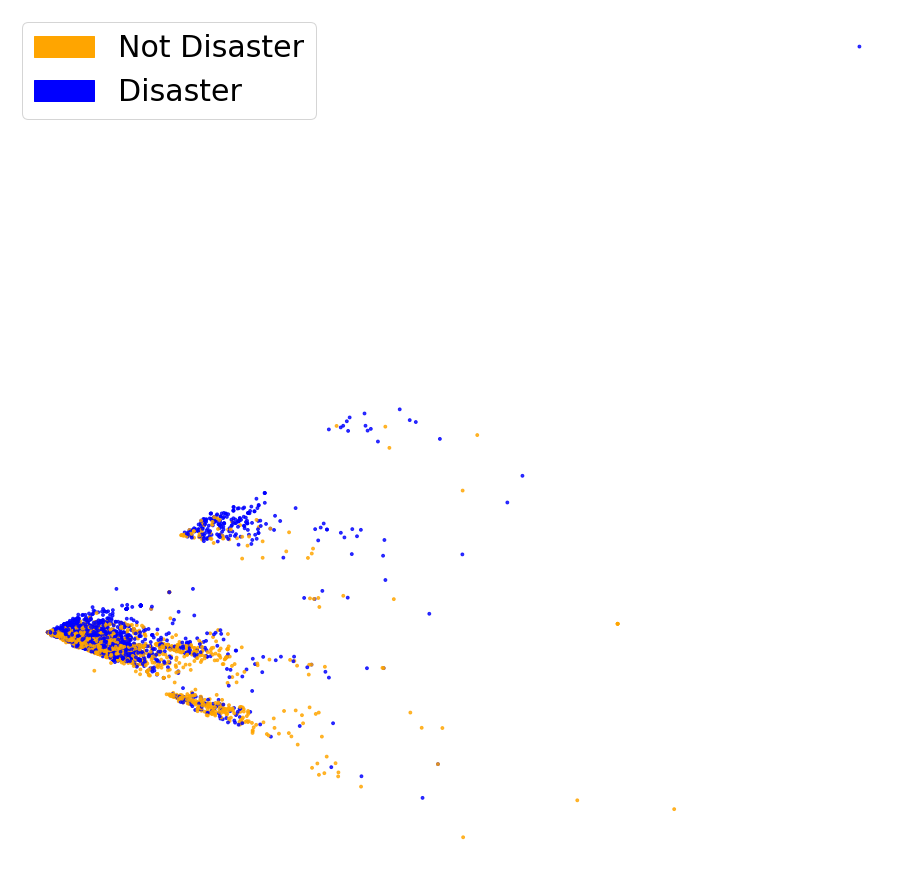

In [78]:
plot_LSA(X_train_cv, y_train)

In [79]:
from sklearn.manifold import TSNE

In [80]:
def plot_TSNE(x, y):
        tsne = TSNE(n_components=2, random_state=42)
        tsne_scores = tsne.fit_transform(x)
        color_mapper = {label:idx for idx,label in enumerate(set(y))}
        color_column = [color_mapper[label] for label in y]
        colors = ['orange','blue']
        plt.figure(figsize=(16, 16))
        plt.scatter(tsne_scores[:,0], tsne_scores[:,1], s=8, alpha=0.8, c=y, cmap=matplotlib.colors.ListedColormap(colors))
        orange_patch = mpatches.Patch(color='orange', label='Not Disaster')
        blue_patch = mpatches.Patch(color='blue', label='Disaster')
        plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})
        plt.axis('off')
        plt.show()

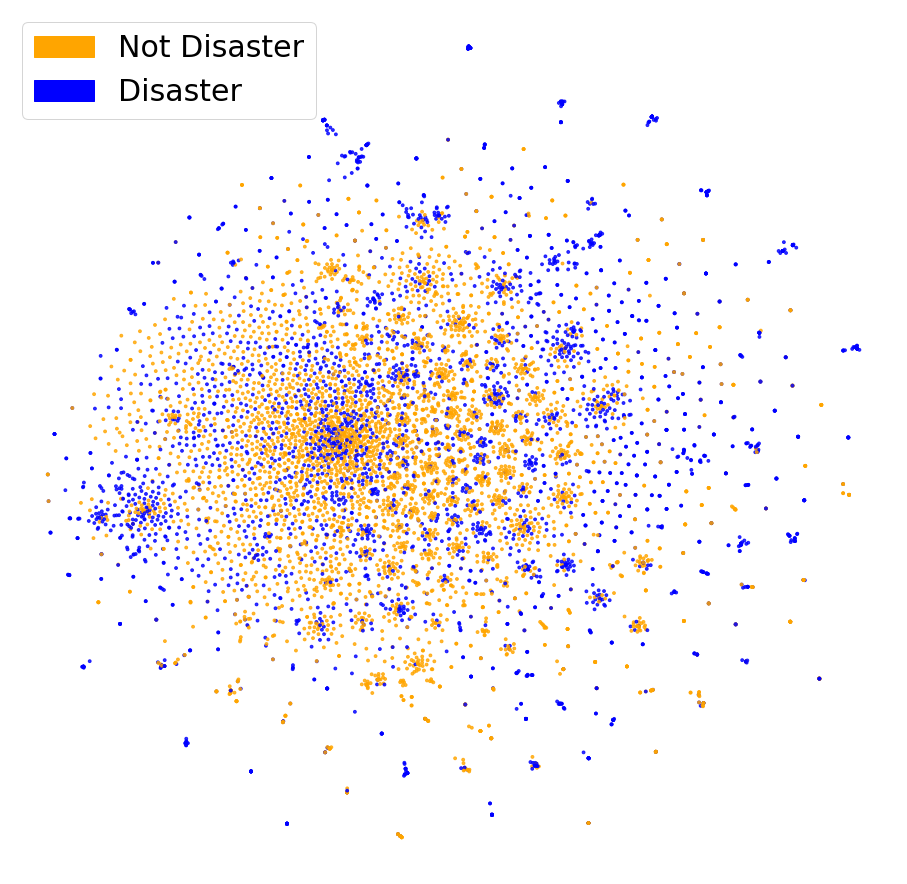

In [81]:
plot_TSNE(X_train_cv, y_train)

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def check_model(classifiers, x, y, cv_n=10):
    results = {}
    for clf in classifiers:
        clf.fit(x, y)
        scores = cross_val_score(clf, x, y, scoring='f1', cv=cv_n)
        print(f'{clf.__class__.__name__}:\n')
        print(f'\tResults:{np.round(scores, 3)}')
        print(f'\tMean:{round(scores.mean(),3)}')
        print(f'\tStandard deviation:{round(scores.std(),3)}\n' )
    
        y_train_pred = cross_val_predict(clf, x, y)
        print(f'\tConfusion matrix:\n{confusion_matrix(y, y_train_pred)}\n\n')
        results[clf.__class__.__name__] = round(scores.mean(),3)
    return results
    

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import RidgeClassifier

In [84]:
log_reg = LogisticRegression()
rnf_clf = RandomForestClassifier() #high risk of overfitting
ridge_clf = RidgeClassifier()

In [85]:
classifiers = [log_reg, rnf_clf, ridge_clf]
test1 = check_model(classifiers, X_train_cv, y_train)

LogisticRegression:

	Results:[0.589 0.496 0.495 0.438 0.567 0.513 0.555 0.44  0.678 0.709]
	Mean:0.548
	Standard deviation:0.087

	Confusion matrix:
[[3467  875]
 [1564 1707]]


RandomForestClassifier:

	Results:[0.61  0.402 0.429 0.385 0.469 0.472 0.468 0.437 0.646 0.631]
	Mean:0.495
	Standard deviation:0.092

	Confusion matrix:
[[3155 1187]
 [1512 1759]]


RidgeClassifier:

	Results:[0.585 0.472 0.439 0.398 0.483 0.451 0.521 0.406 0.617 0.641]
	Mean:0.501
	Standard deviation:0.082

	Confusion matrix:
[[3158 1184]
 [1594 1677]]




# TF-IDF Vectorizer

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_2 = TfidfVectorizer(strip_accents = 'ascii', min_df=2)

X_train_tfidf = vectorizer_2.fit_transform(train_df['text_clear_splited'].str.join(' ') )
X_test_tfidf = vectorizer_2.transform(train_df['text_clear_splited'].str.join(' ') )


In [87]:
words_count(vectorizer, X_train_tfidf, 15)

[('like', 79.33035660912434),
 ('fire', 77.03481791309555),
 ('get', 63.7378538169801),
 ('amp', 60.62573505130469),
 ('via', 52.485002394255005),
 ('one', 50.7168155677235),
 ('new', 50.60784053506772),
 ('people', 47.72071178461596),
 ('news', 44.72057349466971),
 ('video', 42.69676030794794),
 ('disaster', 41.948400317878125),
 ('emergency', 40.17198140153428),
 ('time', 39.213856822674856),
 ('body', 38.91382615408712),
 ('day', 38.30459110662783)]

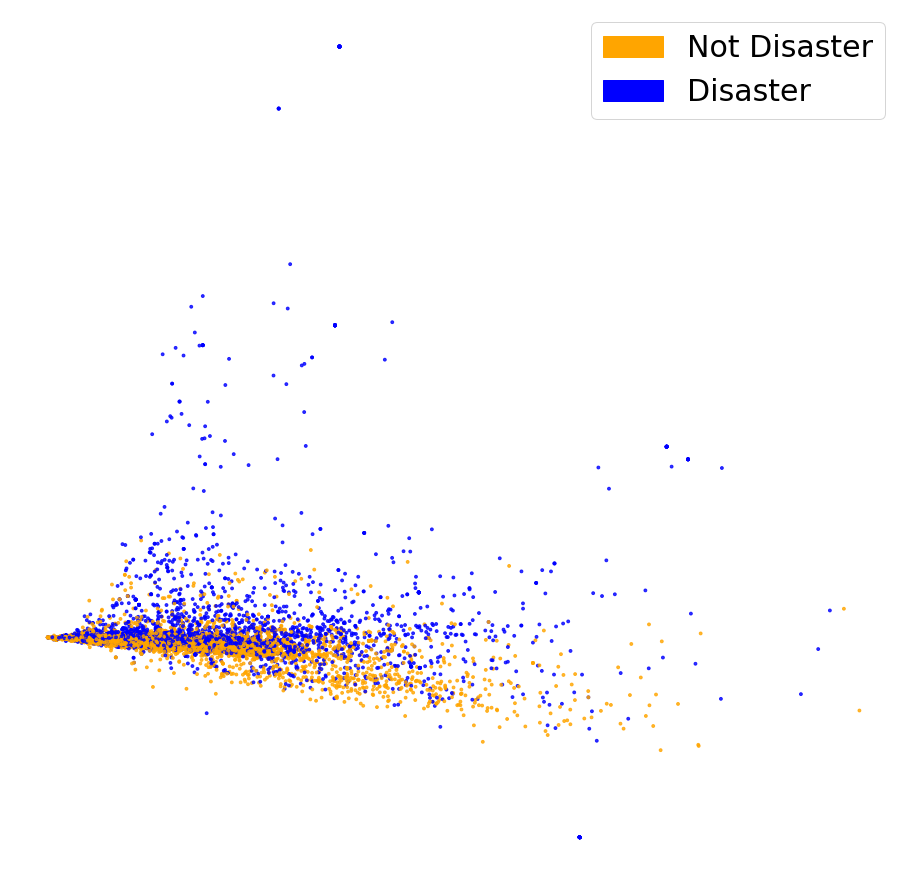

In [88]:
plot_LSA(X_train_tfidf, y_train)

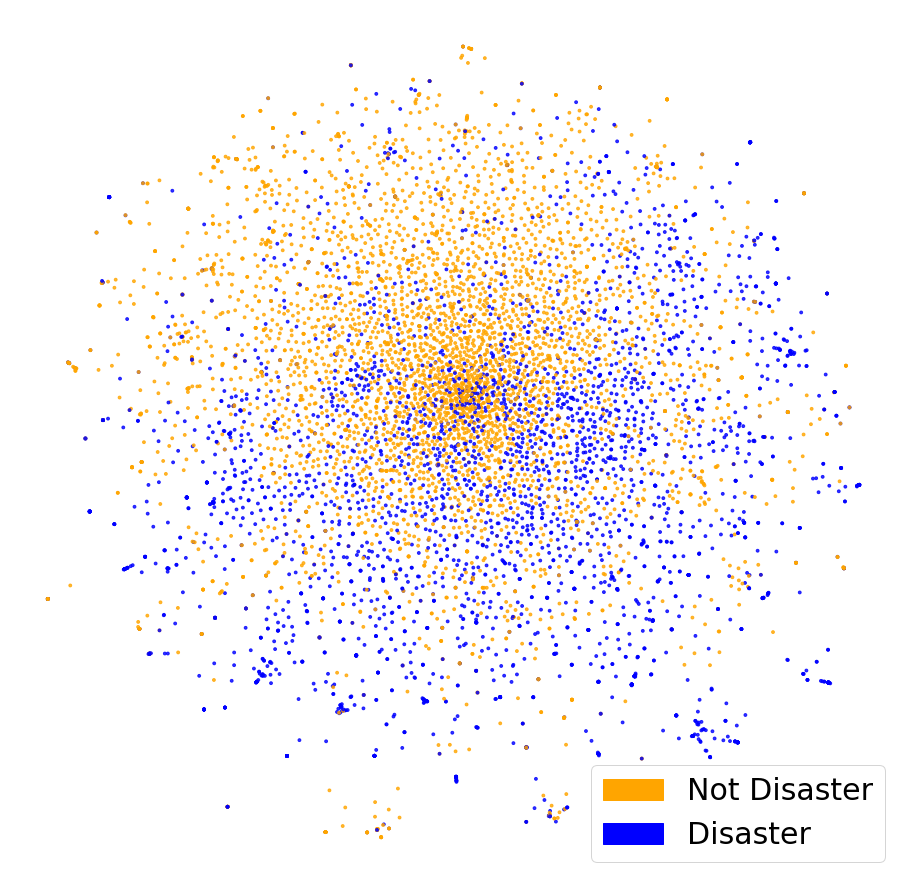

In [89]:
plot_TSNE(X_train_tfidf, y_train)

In [90]:
from sklearn.svm import SVC
svc_clf= SVC(kernel='poly', degree=2, coef0=1, C= 5)
rnf_clf_2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=500, n_jobs=-1)

In [91]:
classifiers = [log_reg, rnf_clf_2, ridge_clf, svc_clf]
test2 = check_model(classifiers, X_train_tfidf, y_train)

LogisticRegression:

	Results:[0.624 0.532 0.521 0.471 0.556 0.495 0.559 0.439 0.67  0.715]
	Mean:0.558
	Standard deviation:0.083

	Confusion matrix:
[[3748  594]
 [1705 1566]]


RandomForestClassifier:

	Results:[0.574 0.51  0.413 0.467 0.543 0.445 0.455 0.439 0.593 0.672]
	Mean:0.511
	Standard deviation:0.078

	Confusion matrix:
[[3384  958]
 [1682 1589]]


RidgeClassifier:

	Results:[0.622 0.484 0.501 0.425 0.538 0.507 0.561 0.449 0.649 0.702]
	Mean:0.544
	Standard deviation:0.085

	Confusion matrix:
[[3414  928]
 [1537 1734]]


SVC:

	Results:[0.623 0.48  0.473 0.433 0.532 0.48  0.527 0.421 0.618 0.67 ]
	Mean:0.526
	Standard deviation:0.081

	Confusion matrix:
[[3250 1092]
 [1597 1674]]




# Count Vectorizer - Bigrams

In [92]:
vectorizer_3 = CountVectorizer(strip_accents = 'ascii', min_df=2, ngram_range = (2,2))

X_train_bigrams = vectorizer_3.fit_transform(train_df['text_clear_splited'].str.join(' '))
X_test_bigrams = vectorizer_3.transform(train_df['text_clear_splited'].str.join(' ') )

In [93]:
words_count(vectorizer_3, X_train_bigrams, 15)

[('suicide bomber', 60),
 ('burning building', 52),
 ('youtube video', 43),
 ('body bag', 43),
 ('look like', 42),
 ('liked youtube', 42),
 ('northern california', 41),
 ('cross body', 39),
 ('oil spill', 39),
 ('california wildfire', 35),
 ('suicide bombing', 34),
 ('mass murder', 33),
 ('full read', 31),
 ('yr old', 30),
 ('natural disaster', 30)]

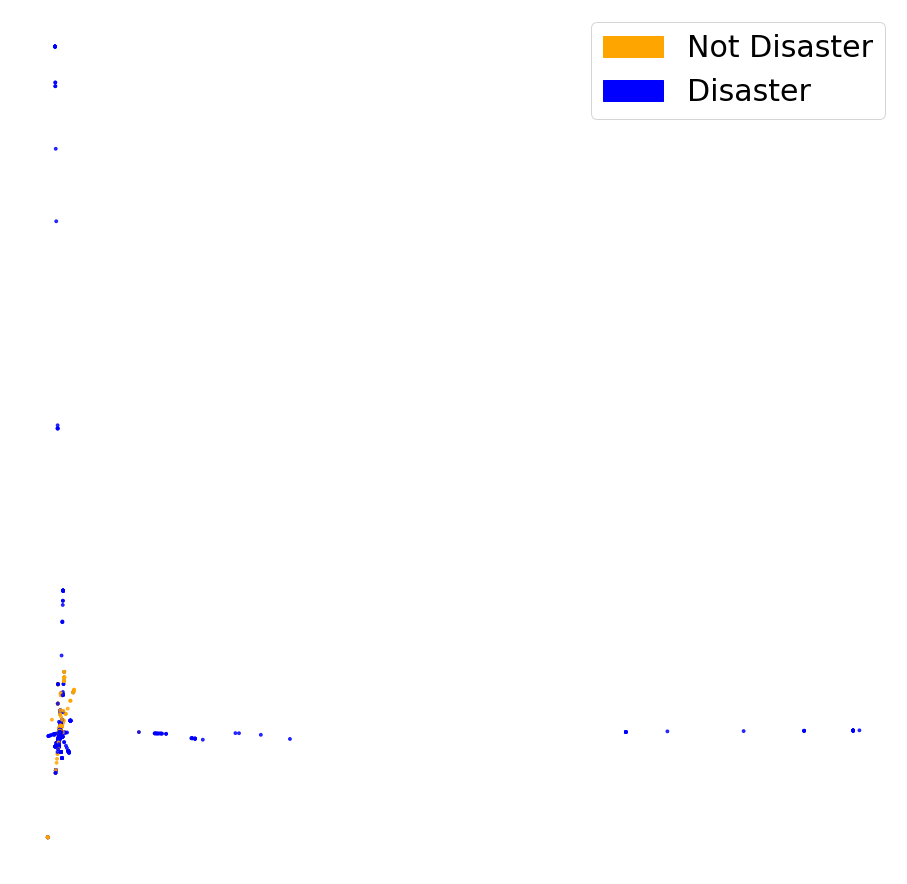

In [94]:
plot_LSA(X_train_bigrams, y_train)

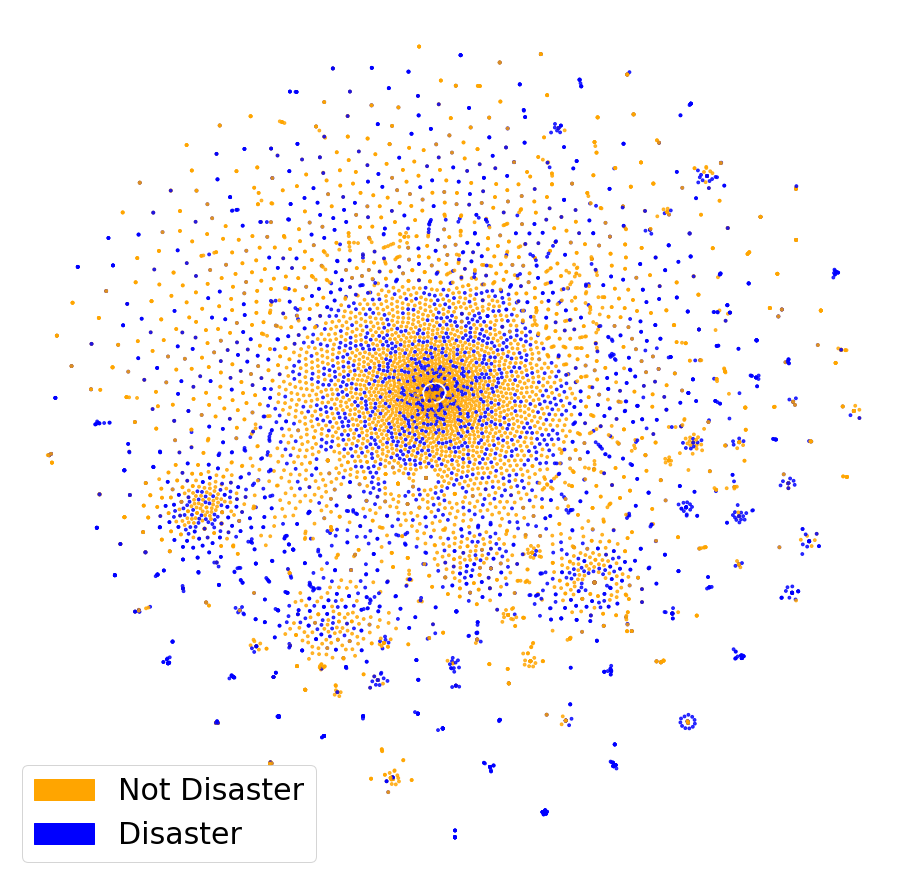

In [95]:
plot_TSNE(X_train_bigrams, y_train)

In [96]:
classifiers = [log_reg, rnf_clf, ridge_clf, svc_clf]
test3 = check_model(classifiers, X_train_bigrams, y_train)

LogisticRegression:

	Results:[0.228 0.239 0.272 0.193 0.195 0.307 0.278 0.266 0.481 0.405]
	Mean:0.286
	Standard deviation:0.087

	Confusion matrix:
[[4179  163]
 [2697  574]]


RandomForestClassifier:

	Results:[0.312 0.294 0.271 0.232 0.28  0.331 0.286 0.286 0.537 0.414]
	Mean:0.324
	Standard deviation:0.084

	Confusion matrix:
[[3972  370]
 [2552  719]]


RidgeClassifier:

	Results:[0.292 0.305 0.283 0.188 0.283 0.371 0.289 0.311 0.532 0.52 ]
	Mean:0.337
	Standard deviation:0.103

	Confusion matrix:
[[3976  366]
 [2539  732]]


SVC:

	Results:[0.269 0.233 0.211 0.221 0.242 0.318 0.284 0.253 0.464 0.41 ]
	Mean:0.29
	Standard deviation:0.08

	Confusion matrix:
[[3999  343]
 [2694  577]]




# TF-IDF Vectorizer - Bigrams

In [97]:
vectorizer_4 = TfidfVectorizer(strip_accents = 'ascii', min_df=2, ngram_range = (2,2))

X_train_bigrams_tfidf = vectorizer_4.fit_transform(train_df['text_clear_splited'].str.join(' '))
X_test_bigrams_tfidf = vectorizer_4.transform(train_df['text_clear_splited'].str.join(' ') )

In [98]:
words_count(vectorizer_4, X_train_bigrams_tfidf, 15)

[('burning building', 30.037672089900852),
 ('look like', 25.058767120187273),
 ('mass murder', 23.27553122354506),
 ('heat wave', 23.18381576326608),
 ('youtube video', 22.874856205725823),
 ('body bag', 22.345721591550436),
 ('liked youtube', 21.956580097421554),
 ('mass murderer', 21.532779261654593),
 ('natural disaster', 20.883366426405395),
 ('suicide bombing', 19.497919192039355),
 ('suicide bomber', 19.334773381767846),
 ('fall cliff', 18.447793819580433),
 ('nuclear reactor', 18.360461887668823),
 ('forest fire', 18.334660671111255),
 ('dust storm', 18.06818432044385)]

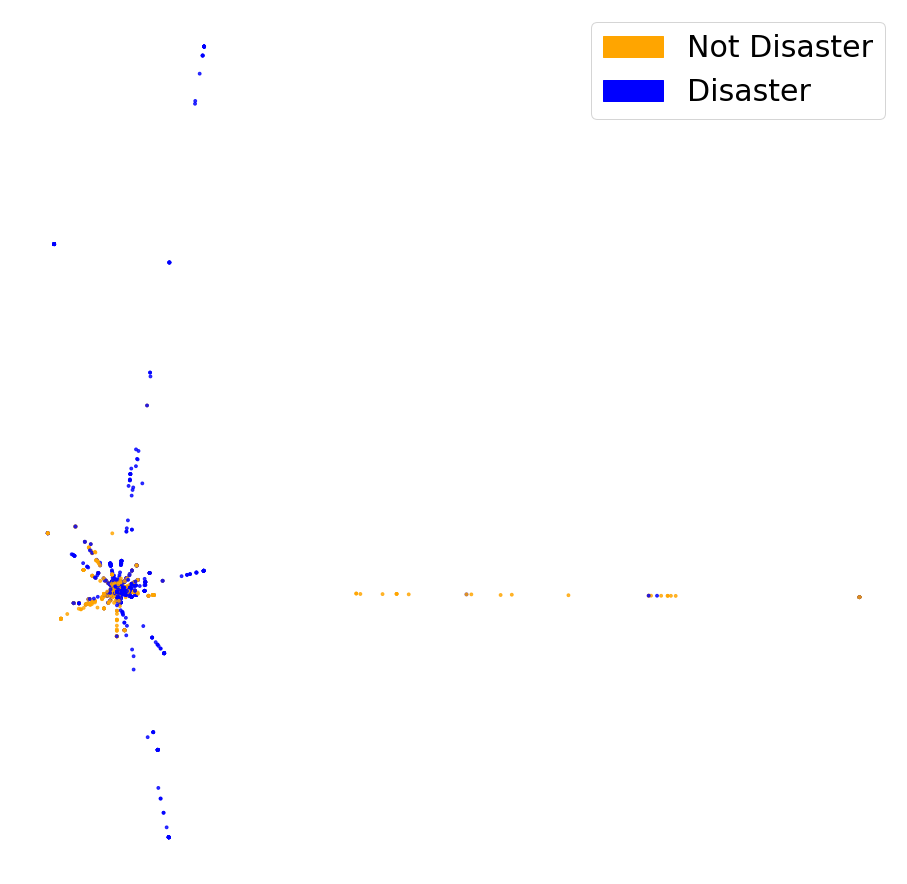

In [99]:
plot_LSA(X_train_bigrams_tfidf, y_train)

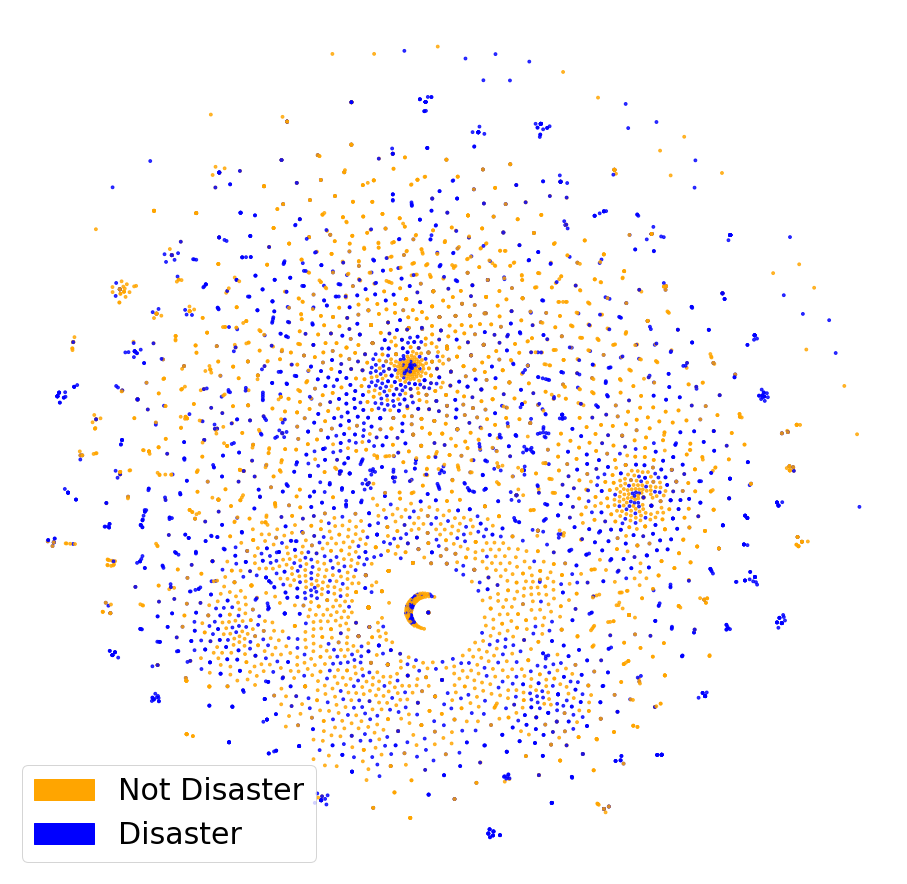

In [100]:
plot_TSNE(X_train_bigrams_tfidf, y_train)

In [101]:
classifiers = [log_reg, rnf_clf, ridge_clf, svc_clf]
test4 = check_model(classifiers, X_train_bigrams_tfidf, y_train)

LogisticRegression:

	Results:[0.182 0.1   0.204 0.177 0.182 0.221 0.132 0.191 0.374 0.34 ]
	Mean:0.21
	Standard deviation:0.081

	Confusion matrix:
[[4213  129]
 [2917  354]]


RandomForestClassifier:

	Results:[0.286 0.225 0.26  0.221 0.259 0.289 0.299 0.256 0.473 0.393]
	Mean:0.296
	Standard deviation:0.075

	Confusion matrix:
[[4033  309]
 [2659  612]]


RidgeClassifier:

	Results:[0.263 0.274 0.29  0.212 0.279 0.349 0.26  0.281 0.533 0.4  ]
	Mean:0.314
	Standard deviation:0.088

	Confusion matrix:
[[4018  324]
 [2625  646]]


SVC:

	Results:[0.196 0.172 0.195 0.219 0.222 0.251 0.252 0.254 0.395 0.349]
	Mean:0.25
	Standard deviation:0.067

	Confusion matrix:
[[4032  310]
 [2793  478]]




# Comparison of results

In [102]:
pd.DataFrame(data=[test1,test2,test3,test4]).set_index(np.array(['CountVectorizer','TfidfVectorizer','CountVectorizer - Bigrams','TfidfVectorizer - Bigrams']))

,LogisticRegression,RandomForestClassifier,RidgeClassifier,SVC
CountVectorizer,0.548,0.495,0.501,NaN
TfidfVectorizer,0.558,0.511,0.544,0.526
CountVectorizer - Bigrams,0.286,0.324,0.337,0.290
TfidfVectorizer - Bigrams,0.210,0.296,0.314,0.250


The best results are obtained with the TfidfVectorizer and the logistic regression model. 
The next step is to find the best parameters.

In [103]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} #l1 lasso l2 ridge
log_reg_cv=GridSearchCV(log_reg,grid,cv=10)
log_reg_cv.fit(X_train_tfidf, y_train)

c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\pmich\appdata\local\prog

c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [104]:
log_reg_cv.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [105]:
log_reg=LogisticRegression(C=1.0, penalty='l2')
check_model([log_reg], X_train_tfidf, y_train)

LogisticRegression:

	Results:[0.624 0.532 0.521 0.471 0.556 0.495 0.559 0.439 0.67  0.715]
	Mean:0.558
	Standard deviation:0.083

	Confusion matrix:
[[3748  594]
 [1705 1566]]




{'LogisticRegression': 0.558}